# Algo to find delay between video with heatmap

In [1]:
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report

In [2]:
ds = np.load(r"..\datasets\isia_flow_similarity_with_delay.npy", allow_pickle=True)

In [3]:
class DelayHeatMap():
    def predict(self, X: list):
        rtn = []
        for video in X:
            shape = (20,20)
            video = np.reshape(video, shape)
            heatMap = np.zeros(video.shape)
            heatMap[np.argmax(video, axis=0), np.arange(video.shape[1])] = 1
            delay = dict(zip([*range(20)], [0] * 20))

            for i in range(20):
                for j in range(20):
                    if(heatMap[i][j]==1):
                        tmp = i-j if i > j else j-i
                        delay[tmp]+=1
            rtn.append(max(delay, key=delay.get))

        return rtn

    def heatMap(self, x:list):
        shape = (20,20)
        result = np.reshape(x, shape)
        heatMap = np.zeros(result.shape)
        heatMap[np.argmax(result, axis=0), np.arange(result.shape[1])] = 1

        sns.heatmap(heatMap)
        print(self.predict([x]))

    def report(self, X: list, y:list):
        y_pred_test = self.predict(X)
        print(classification_report(y, y_pred_test))

In [4]:
dhm = DelayHeatMap()

[2]


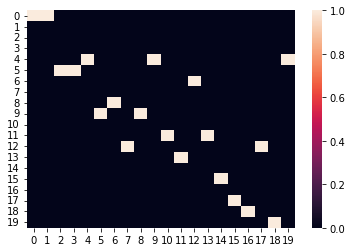

In [16]:
dhm.heatMap(ds[10,0])

## Delay between 0 and 10

In [5]:
tmp = ds.tolist()
data = []
for i in range(len(tmp)):
    if tmp[i][1]!=-1 and tmp[i][1]<10:
        data.append(tmp[i])

data = np.array(data, dtype=object)

In [6]:
dhm.report(data[:,0], data[:,1].tolist())

              precision    recall  f1-score   support

           0       0.62      0.58      0.60       453
           1       0.36      0.75      0.48       476
           2       0.36      0.66      0.47       433
           3       0.42      0.56      0.48       462
           4       0.49      0.48      0.48       468
           5       0.53      0.43      0.47       459
           6       0.58      0.38      0.46       458
           7       0.67      0.33      0.44       467
           8       0.65      0.25      0.36       487
           9       0.80      0.28      0.41       459
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0

    accuracy                           0.47      4622
   macro avg       0.34   

c:\Users\Nicolas Boizard\AppData\Local\Python Environment\ISIA_Lab\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Nicolas Boizard\AppData\Local\Python Environment\ISIA_Lab\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Nicolas Boizard\AppData\Local\Python Environment\ISIA_Lab\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_

## Delay between 0 and 20

-1 means delay is greater than the lenght of the sequnece

In [7]:
data = ds.tolist()

for i in range(len(data)):
    if data[i][1] == 20: data[i][1] = -1

data = np.array(data, dtype=object)

X = data[:,0].tolist()
y = data[:,1].tolist()

In [8]:
dhm.report(data[:,0], data[:,1].tolist())

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       501
           0       0.41      0.58      0.48       453
           1       0.18      0.75      0.29       476
           2       0.20      0.66      0.31       433
           3       0.22      0.56      0.32       462
           4       0.26      0.48      0.34       468
           5       0.29      0.43      0.34       459
           6       0.31      0.38      0.34       458
           7       0.35      0.33      0.34       467
           8       0.33      0.25      0.29       487
           9       0.42      0.28      0.33       459
          10       0.48      0.25      0.33       458
          11       0.44      0.23      0.30       359
          12       0.48      0.14      0.22       418
          13       0.44      0.12      0.19       408
          14       0.59      0.08      0.14       411
          15       0.50      0.05      0.08       411
          16       0.35    

c:\Users\Nicolas Boizard\AppData\Local\Python Environment\ISIA_Lab\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Nicolas Boizard\AppData\Local\Python Environment\ISIA_Lab\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Nicolas Boizard\AppData\Local\Python Environment\ISIA_Lab\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control